In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [124]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [126]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [127]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


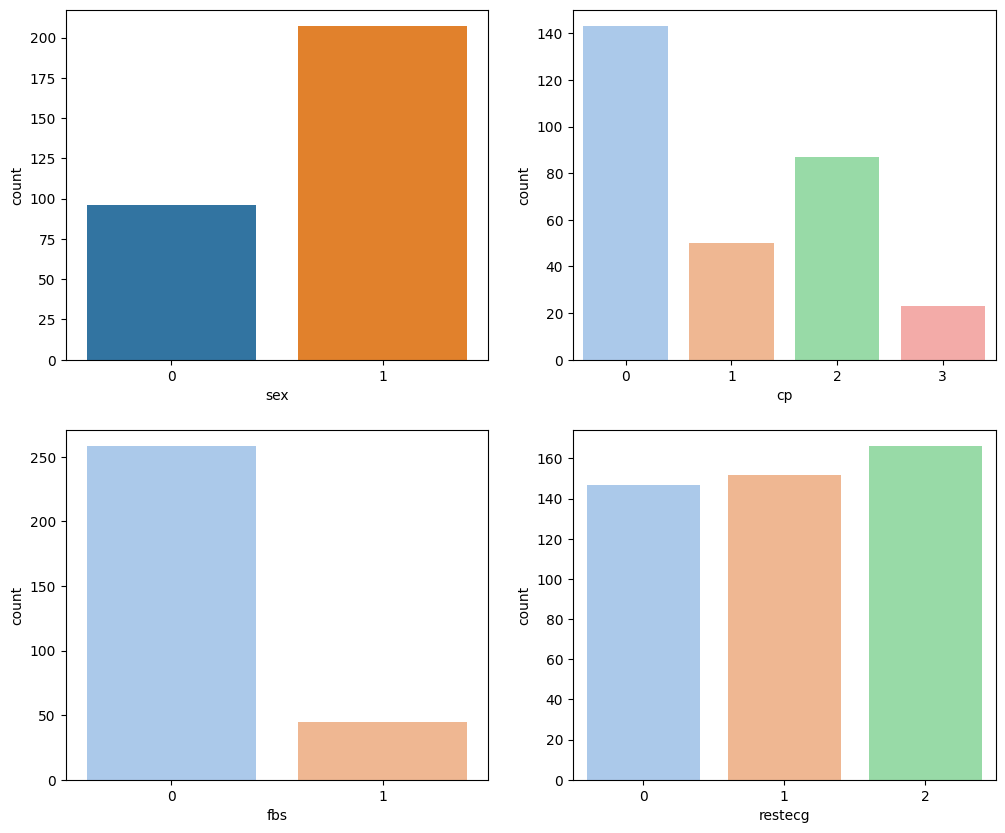

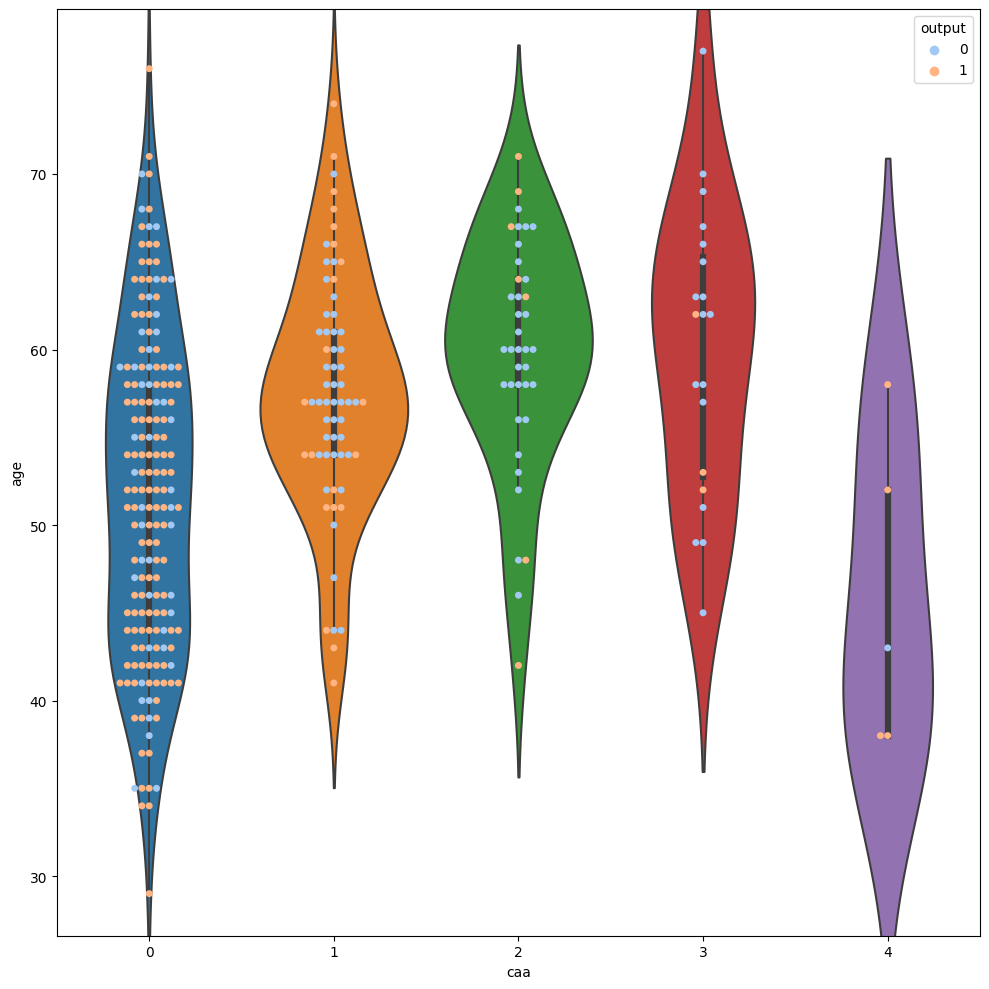

number of peaple having sex as 1 is greater than 0
People of chest pain category 0 have the highest count, whereas of count of chest pain 3 is the lowest
People of fbs category 1 are less than 25% of people of fbs category 0
Thall count is maximum for type 2 ( 165 ) and min for type 0 ( 2 )
ECG count is almost the same for type 0 and 1
People belonging to category 1 , 2 and 3 are more or less at similar risk


In [128]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


sns.countplot(x='sex', data=df, ax=axes[0, 0])

sns.countplot(x='cp', data=df, palette='pastel', ax=axes[0, 1])


sns.countplot(x='fbs', data=df, palette='pastel', ax=axes[1, 0])



sns.countplot(x='thall', data=df, palette='pastel', ax=axes[1, 1])


sns.countplot(x='restecg', data=df, palette='pastel')
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

plt.tight_layout()

plt.show()

print('number of peaple having sex as 1 is greater than 0')
print('People of chest pain category 0 have the highest count, whereas of count of chest pain 3 is the lowest')
print('People of fbs category 1 are less than 25% of people of fbs category 0')
print('Thall count is maximum for type 2 ( 165 ) and min for type 0 ( 2 )')
print('ECG count is almost the same for type 0 and 1')
print('People belonging to category 1 , 2 and 3 are more or less at similar risk')


sex vs cp


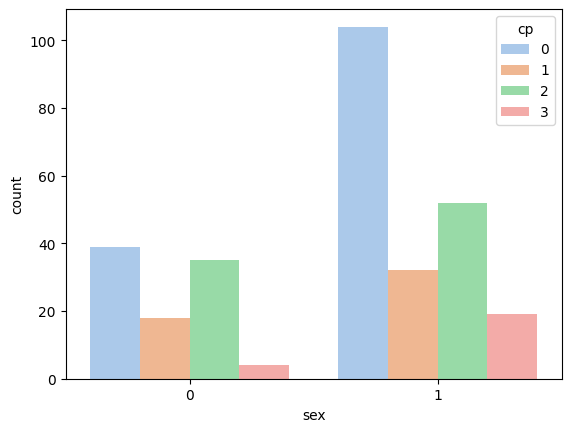

In [129]:
ax=plt.axis()
sns.countplot(x='sex', hue='cp', data=df, palette='pastel')
print('sex vs cp')

In [130]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

knn method

Accuracy: 0.6885245901639344


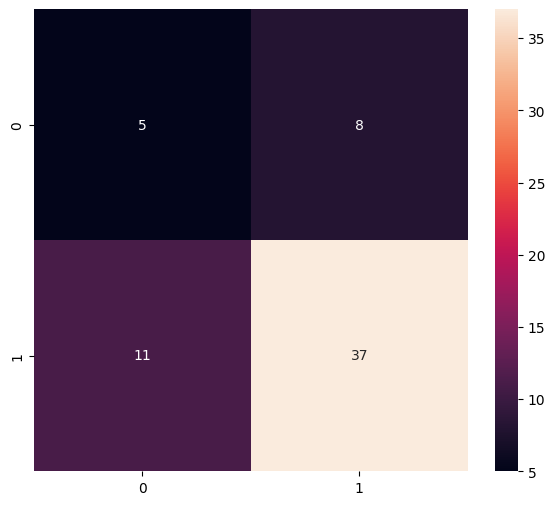

In [132]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(cf_matrix,annot=True,fmt='d')
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Logistic Regression Method

In [133]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


/Users/jesslyngabrielle/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


xgboost method

In [134]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


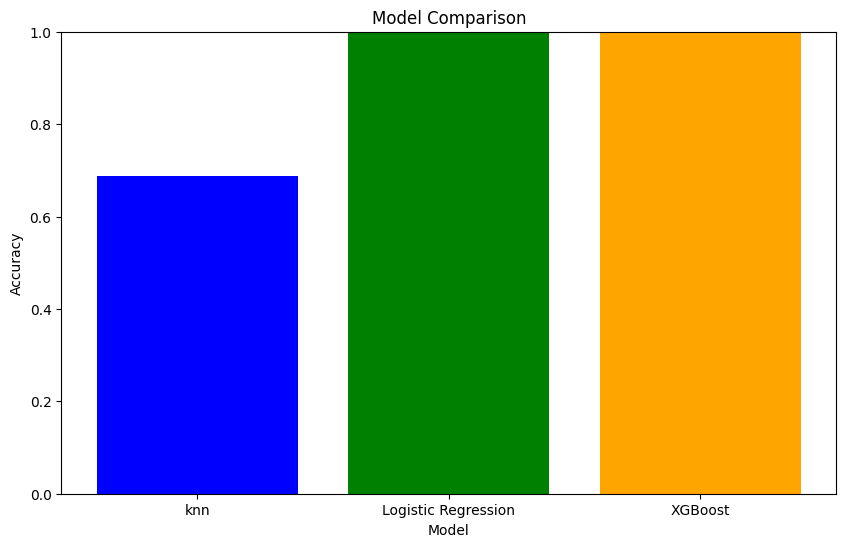

In [135]:
model_accuracy = {
    'knn':0.6885245901639344,
    'Logistic Regression': 1.0,
    'XGBoost': 1.0
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to better compare models
plt.show()

Logistic Regression and XGBOOST is the most accurate model to predict